Recurrent Neural networks
=====

### RNN  

<img src="imgs/rnn.png" width="20%">

A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

```python
keras.layers.recurrent.SimpleRNN(units, activation='tanh', use_bias=True, 
                                 kernel_initializer='glorot_uniform', 
                                 recurrent_initializer='orthogonal', 
                                 bias_initializer='zeros', 
                                 kernel_regularizer=None, 
                                 recurrent_regularizer=None, 
                                 bias_regularizer=None, 
                                 activity_regularizer=None, 
                                 kernel_constraint=None, recurrent_constraint=None, 
                                 bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)
```

#### Arguments:

<ul>
<li><strong>units</strong>: Positive integer, dimensionality of the output space.</li>
<li><strong>activation</strong>: Activation function to use
    (see <a href="http://keras.io/activations/">activations</a>).
    If you pass None, no activation is applied
    (ie. "linear" activation: <code>a(x) = x</code>).</li>
<li><strong>use_bias</strong>: Boolean, whether the layer uses a bias vector.</li>
<li><strong>kernel_initializer</strong>: Initializer for the <code>kernel</code> weights matrix,
    used for the linear transformation of the inputs.
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>recurrent_initializer</strong>: Initializer for the <code>recurrent_kernel</code>
    weights matrix,
    used for the linear transformation of the recurrent state.
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>bias_initializer</strong>: Initializer for the bias vector
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>kernel_regularizer</strong>: Regularizer function applied to
    the <code>kernel</code> weights matrix
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>recurrent_regularizer</strong>: Regularizer function applied to
    the <code>recurrent_kernel</code> weights matrix
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>bias_regularizer</strong>: Regularizer function applied to the bias vector
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>activity_regularizer</strong>: Regularizer function applied to
    the output of the layer (its "activation").
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>kernel_constraint</strong>: Constraint function applied to
    the <code>kernel</code> weights matrix
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
<li><strong>recurrent_constraint</strong>: Constraint function applied to
    the <code>recurrent_kernel</code> weights matrix
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
<li><strong>bias_constraint</strong>: Constraint function applied to the bias vector
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
<li><strong>dropout</strong>: Float between 0 and 1.
    Fraction of the units to drop for
    the linear transformation of the inputs.</li>
<li><strong>recurrent_dropout</strong>: Float between 0 and 1.
    Fraction of the units to drop for
    the linear transformation of the recurrent state.</li>
</ul>

#### Backprop Through time  

Contrary to feed-forward neural networks, the RNN is characterized by the ability of encoding longer past information, thus very suitable for sequential models. The BPTT extends the ordinary BP algorithm to suit the recurrent neural
architecture.

<img src="imgs/rnn2.png" width="45%">

**Reference**: [Backpropagation through Time](http://ir.hit.edu.cn/~jguo/docs/notes/bptt.pdf)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import keras 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# -- Keras Import
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing import image

from keras.datasets import imdb
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

from keras.layers import Activation, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


## IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. 

IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. 

There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. 

http://ai.stanford.edu/~amaas/data/sentiment/

### Data Preparation - IMDB

In [5]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Example:')
print(X_train[:1])

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Example:
[ [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 1

#### Model building 

In [7]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(128))  
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam')

print("Train...")
model.fit(X_train, y_train, batch_size=batch_size, epochs=1, 
          validation_data=(X_test, y_test))

Build model...
Train...


/Users/valerio/anaconda3/envs/deep-learning-pydatait-tutorial/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 104s - loss: 0.7329 - val_loss: 0.6832


### LSTM  

A LSTM network is an artificial neural network that contains LSTM blocks instead of, or in addition to, regular network units. A LSTM block may be described as a "smart" network unit that can remember a value for an arbitrary length of time. 

Unlike traditional RNNs, an Long short-term memory network is well-suited to learn from experience to classify, process and predict time series when there are very long time lags of unknown size between important events.

<img src="imgs/gru.png" width="60%">

```python
keras.layers.recurrent.LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
                            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
                            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
                            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
                            dropout=0.0, recurrent_dropout=0.0)
```

#### Arguments

<ul>
<li><strong>units</strong>: Positive integer, dimensionality of the output space.</li>
<li><strong>activation</strong>: Activation function to use
    If you pass None, no activation is applied
    (ie. "linear" activation: <code>a(x) = x</code>).</li>
<li><strong>recurrent_activation</strong>: Activation function to use
    for the recurrent step.</li>
<li><strong>use_bias</strong>: Boolean, whether the layer uses a bias vector.</li>
<li><strong>kernel_initializer</strong>: Initializer for the <code>kernel</code> weights matrix,
    used for the linear transformation of the inputs.</li>
<li><strong>recurrent_initializer</strong>: Initializer for the <code>recurrent_kernel</code>
    weights matrix,
    used for the linear transformation of the recurrent state.</li>
<li><strong>bias_initializer</strong>: Initializer for the bias vector.</li>
<li><strong>unit_forget_bias</strong>: Boolean.
    If True, add 1 to the bias of the forget gate at initialization.
    Setting it to true will also force <code>bias_initializer="zeros"</code>.
    This is recommended in <a href="http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf">Jozefowicz et al.</a></li>
<li><strong>kernel_regularizer</strong>: Regularizer function applied to
    the <code>kernel</code> weights matrix.</li>
<li><strong>recurrent_regularizer</strong>: Regularizer function applied to
    the <code>recurrent_kernel</code> weights matrix.</li>
<li><strong>bias_regularizer</strong>: Regularizer function applied to the bias vector.</li>
<li><strong>activity_regularizer</strong>: Regularizer function applied to
    the output of the layer (its "activation").</li>
<li><strong>kernel_constraint</strong>: Constraint function applied to
    the <code>kernel</code> weights matrix.</li>
<li><strong>recurrent_constraint</strong>: Constraint function applied to
    the <code>recurrent_kernel</code> weights matrix.</li>
<li><strong>bias_constraint</strong>: Constraint function applied to the bias vector.</li>
<li><strong>dropout</strong>: Float between 0 and 1.
    Fraction of the units to drop for
    the linear transformation of the inputs.</li>
<li><strong>recurrent_dropout</strong>: Float between 0 and 1.
    Fraction of the units to drop for
    the linear transformation of the recurrent state.</li>
</ul>

### GRU  

Gated recurrent units are a gating mechanism in recurrent neural networks. 

Much similar to the LSTMs, they have fewer parameters than LSTM, as they lack an output gate.

<img src="imgs/gru.png" />

```python
keras.layers.recurrent.GRU(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
                           kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
                           bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, 
                           bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
                           recurrent_constraint=None, bias_constraint=None, 
                           dropout=0.0, recurrent_dropout=0.0)
```

### Your Turn! - Hands on Rnn

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))

# !!! Play with those! try and get better results!
#model.add(SimpleRNN(128))  
#model.add(GRU(128))  
#model.add(LSTM(128))  

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam')

print("Train...")
model.fit(X_train, y_train, batch_size=batch_size, 
          epochs=4, validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

---

## Convolutional LSTM

> This section demonstrates the use of a **Convolutional LSTM network**.

> This network is used to predict the next frame of an artificially
generated movie which contains moving squares.


#### Artificial Data Generation

Generate movies with `3` to `7` moving squares inside.

The squares are of shape $1 \times 1$ or $2 \times 2$ pixels, which move linearly over time.

For convenience we first create movies with bigger width and height (`80x80`) 
and at the end we select a $40 \times 40$ window.

In [1]:
# Artificial Data Generation
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

### Model

In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


We create a layer which take as input movies of shape `(n_frames, width, height, channels)` and returns a movie
of identical shape.

In [3]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

### Train the Network

#### Beware: This takes time (~3 mins per epoch on my hardware)

In [4]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

Train on 950 samples, validate on 50 samples
Epoch 1/2
950/950 [==============================] - 180s - loss: 0.3457 - val_loss: 0.6237
Epoch 2/2
950/950 [==============================] - 181s - loss: 0.0691 - val_loss: 0.4724


### Test the Network

In [5]:
# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

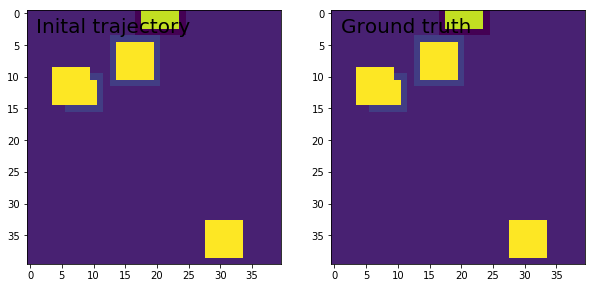

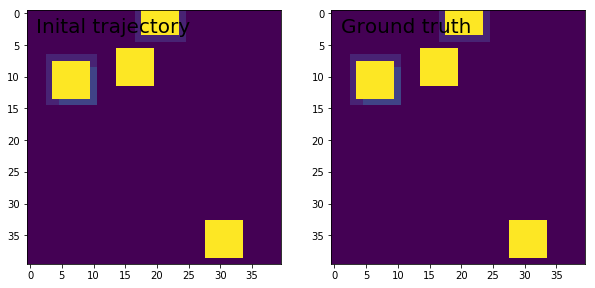

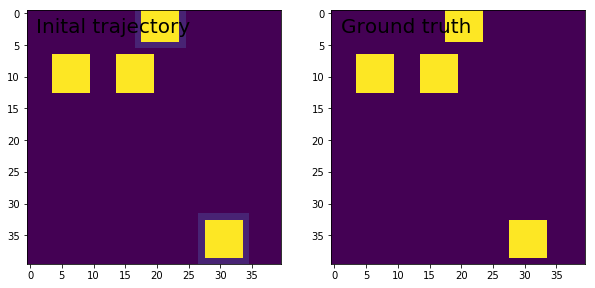

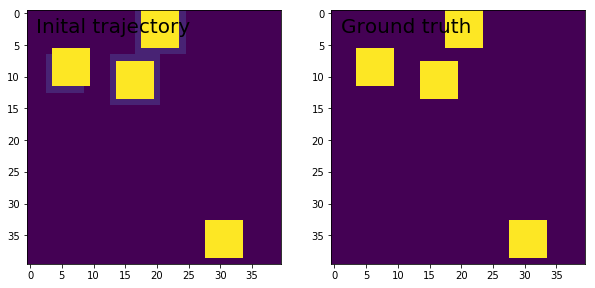

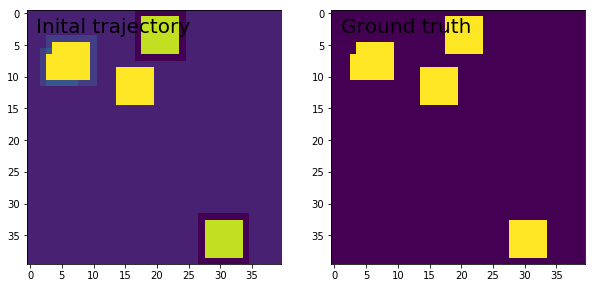

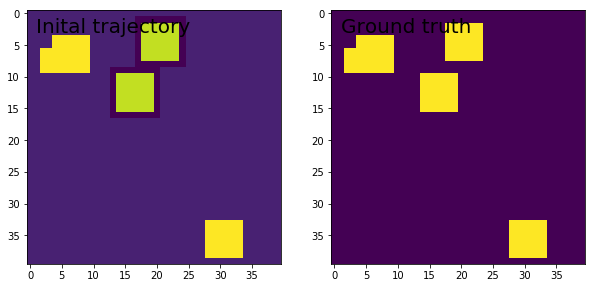

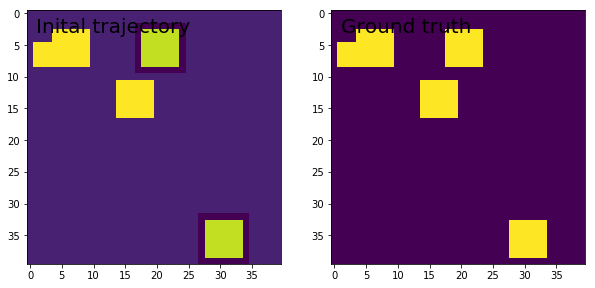

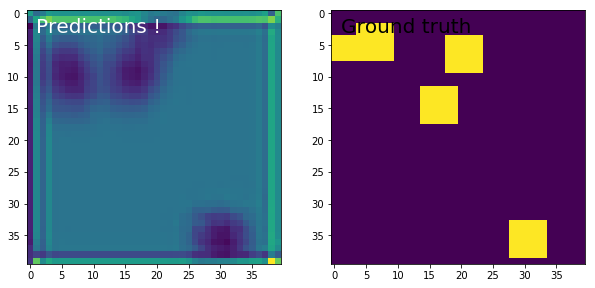

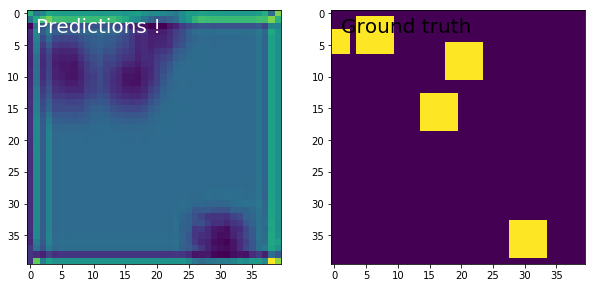

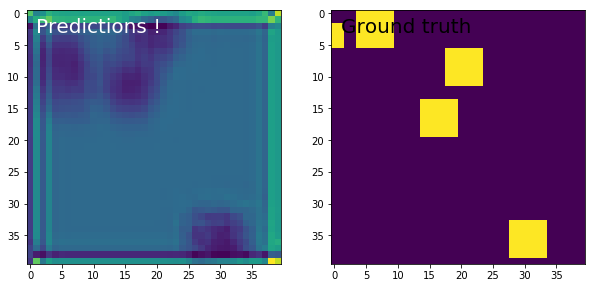

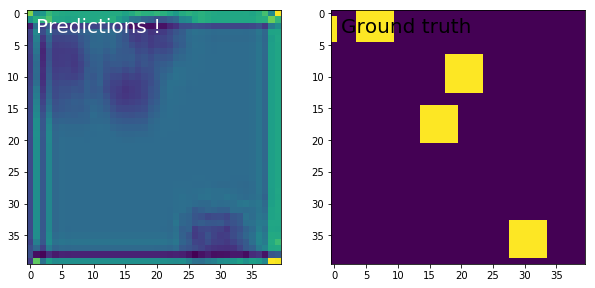

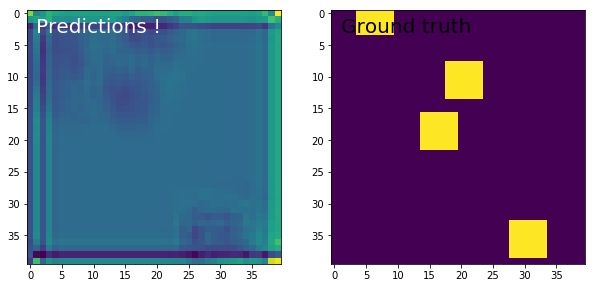

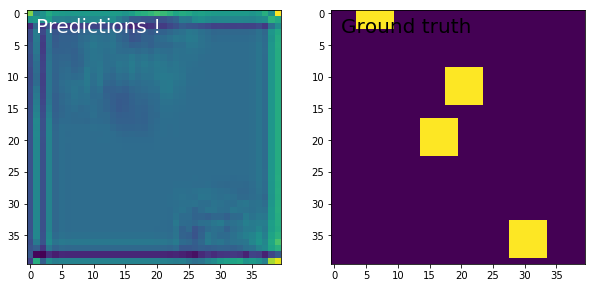

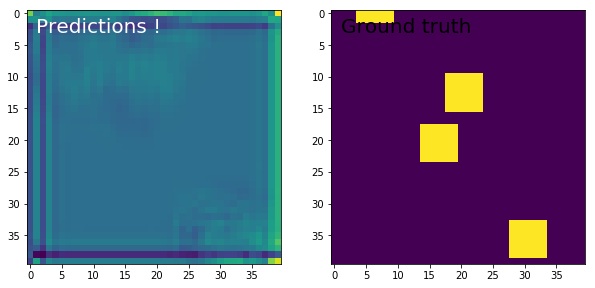

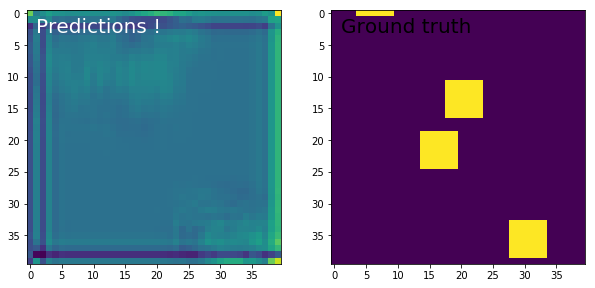

In [8]:
# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Inital trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('imgs/convlstm/%i_animate.png' % (i + 1))